# openCV

* openCV [docs](https://docs.opencv.org/4.1.2/)
* Official [tutorials](https://docs.opencv.org/4.1.2/d7/da8/tutorial_table_of_content_imgproc.html)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print(cv2.__version__)

4.5.1


In [2]:
def img_show(img):
    '''Show an openCV BGR uint8 image.'''
    img_to_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(dpi=100)
    plt.axis('off')
    plt.imshow(img_to_show)
    plt.show()

(448, 798, 3) uint8 208.96575795888532


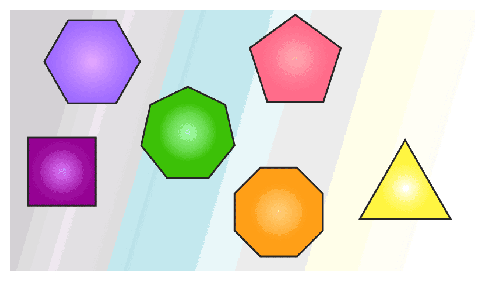

In [3]:
img = cv2.imread('polygon.png')
print(img.shape, img.dtype, img.mean())  # openCV image is a numpy array HxWx3
img_show(img)

(120, 160, 3)


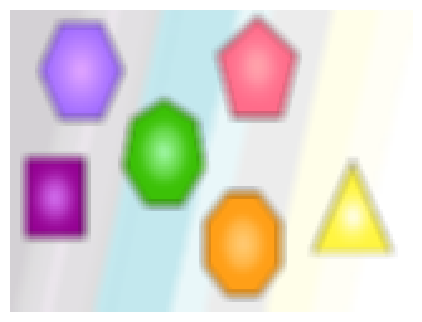

In [4]:
img2 = cv2.resize(img, dsize=(160, 120))  # WxH
img2=cv2.GaussianBlur(img2, ksize=(5, 5), sigmaX=5)
print(img2.shape)
img_show(img2)

[[  0.70710678   0.70710678 -41.52752468]
 [ -0.70710678   0.70710678 347.74368671]]


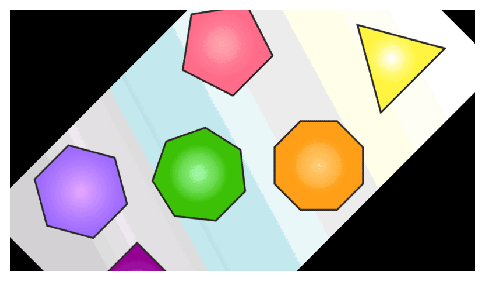

In [5]:
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    print(rot_mat)
    res = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return res


img3 = rotate_image(img, 45)
img_show(img3)

## Homework 02

Image: [link](https://drive.google.com/file/d/1xdzrOE2OFzNoA-T3tGTUeQqKs99l0UXq/view?usp=sharing)

### Tasks:
1. (2) Find centers of mass of the polygons
2. (1) Find the average colour of each polygon (include border line, exclude background)
3. (2) Determine the polygons types (number of vertices)

Output may look like:
```
x = 123 y = 321 color = [123, 42, 255] n_verices = 5
...
```

### Tips:
1. Create a binary mask polygon/background (black border lines may help);
2. Find contours of polygons;
3. Analyze the results with openCV;

Useful [tutorial1](https://docs.opencv.org/4.1.2/d7/d4d/tutorial_py_thresholding.html), [tutorial2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html).

In [6]:
img = cv2.imread('polygon.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

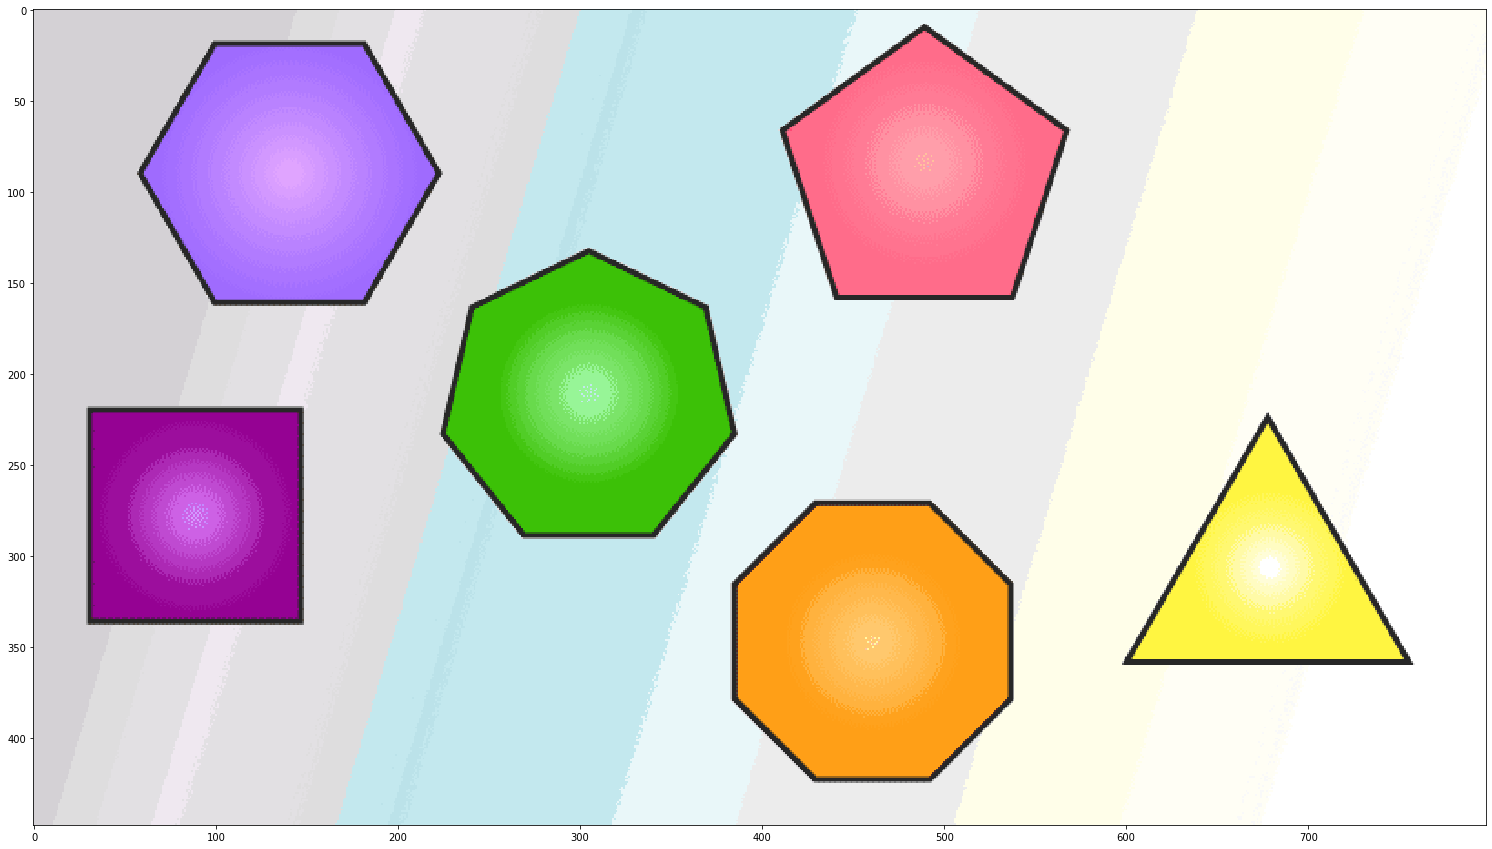

In [7]:
plt.figure(figsize=(30,15))
plt.imshow(img)

In [8]:
img_gray = cv2.imread('polygon.png',cv2.IMREAD_GRAYSCALE)

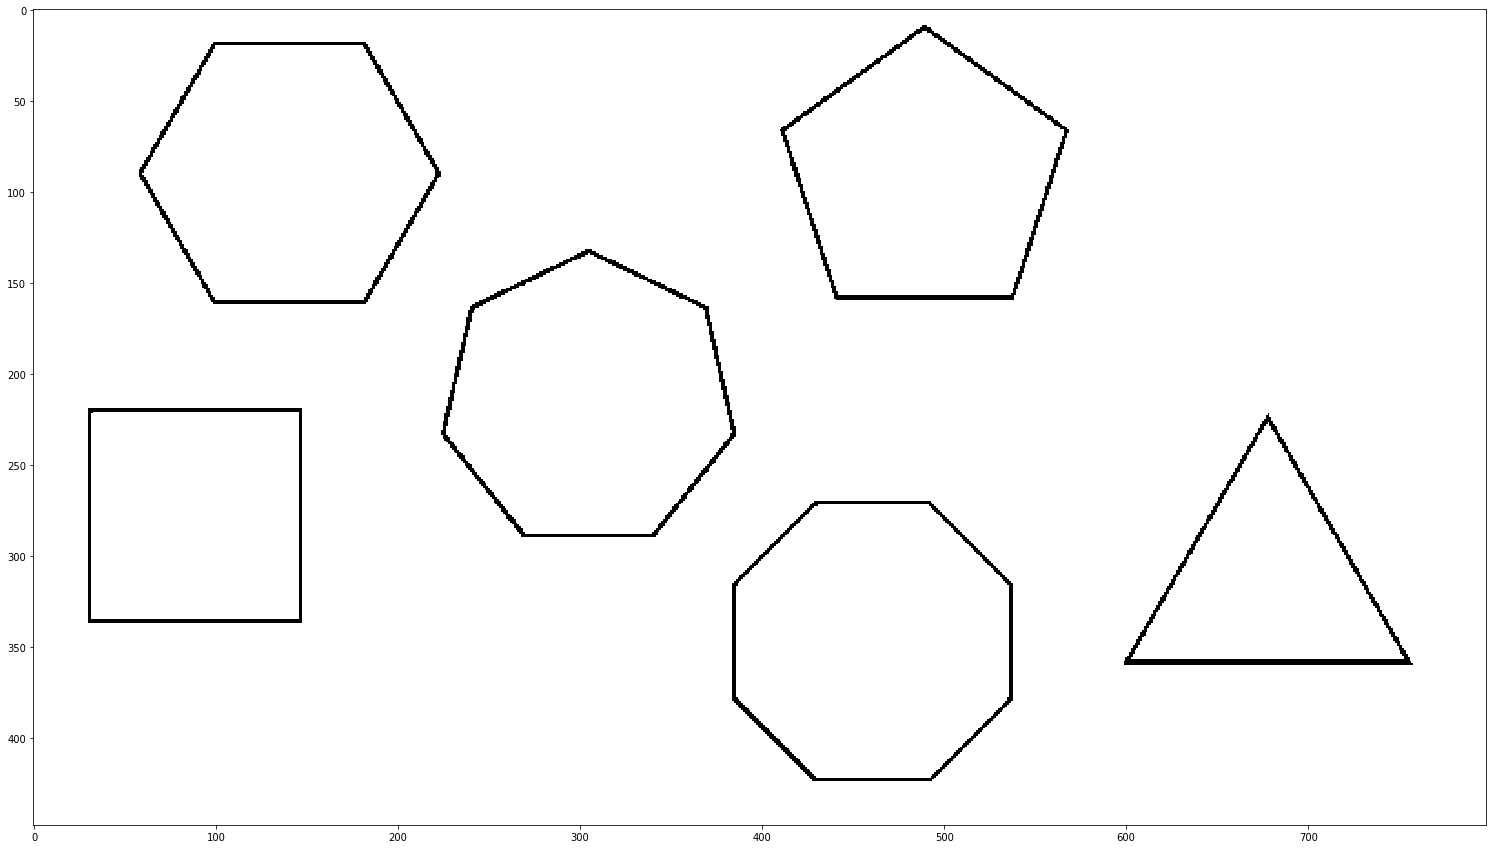

In [9]:
ret,thresh = cv2.threshold(img_gray,50,255,cv2.THRESH_BINARY)
plt.figure(figsize=(30,15))
plt.imshow(thresh,'gray',vmin=0,vmax=255)

In [10]:
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, 4)

Номера нужных контуров:
- 1,2 восьмиугольник,
- 3,4 треугольник,
- 5,6 квадрат,
- 7,8 семиугольник,
- 9,10 шестиугольник,
- 11,12 пятиугольник

## Task 1

Find centers of mass of the polygons

In [11]:
counter_names = {1:"восьмиугольник", 2:"восьмиугольник", 3:"треугольник", 4:"треугольник",
                 5:"квадрат", 6:"квадрат", 7:"семиугольник", 8:"семиугольник",
                 9:"шестиугольник", 10:"шестиугольник", 11:"пятиугольник", 12:"пятиугольник"}
counter_out_num = [1,3,5,7,9,11]
counter_in_num = [2,4,6,8,10,12]
mass_centers = []
for i in counter_out_num:
    cnt = contours[i]
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    print("Центр масс {}а: ({},{})".format(counter_names[i],cx,cy))
    mass_centers.append([cx,cy])

Центр масс восьмиугольника: (460,346)
Центр масс треугольника: (677,312)
Центр масс квадрата: (88,277)
Центр масс семиугольника: (304,214)
Центр масс шестиугольника: (140,89)
Центр масс пятиугольника: (489,91)


## Task 2
Find the average colour of each polygon (include border line, exclude background)

In [12]:
black = np.zeros(thresh.shape,np.uint8)
contours_out = [contours[i] for i in range(13) if i%2==1]
contours_in = [contours[i] for i in range(1,13) if i%2==0]

### Average colour of each polygon including border line

In [13]:
mask_full_out = cv2.drawContours(black,contours_out,-1,255,-1)

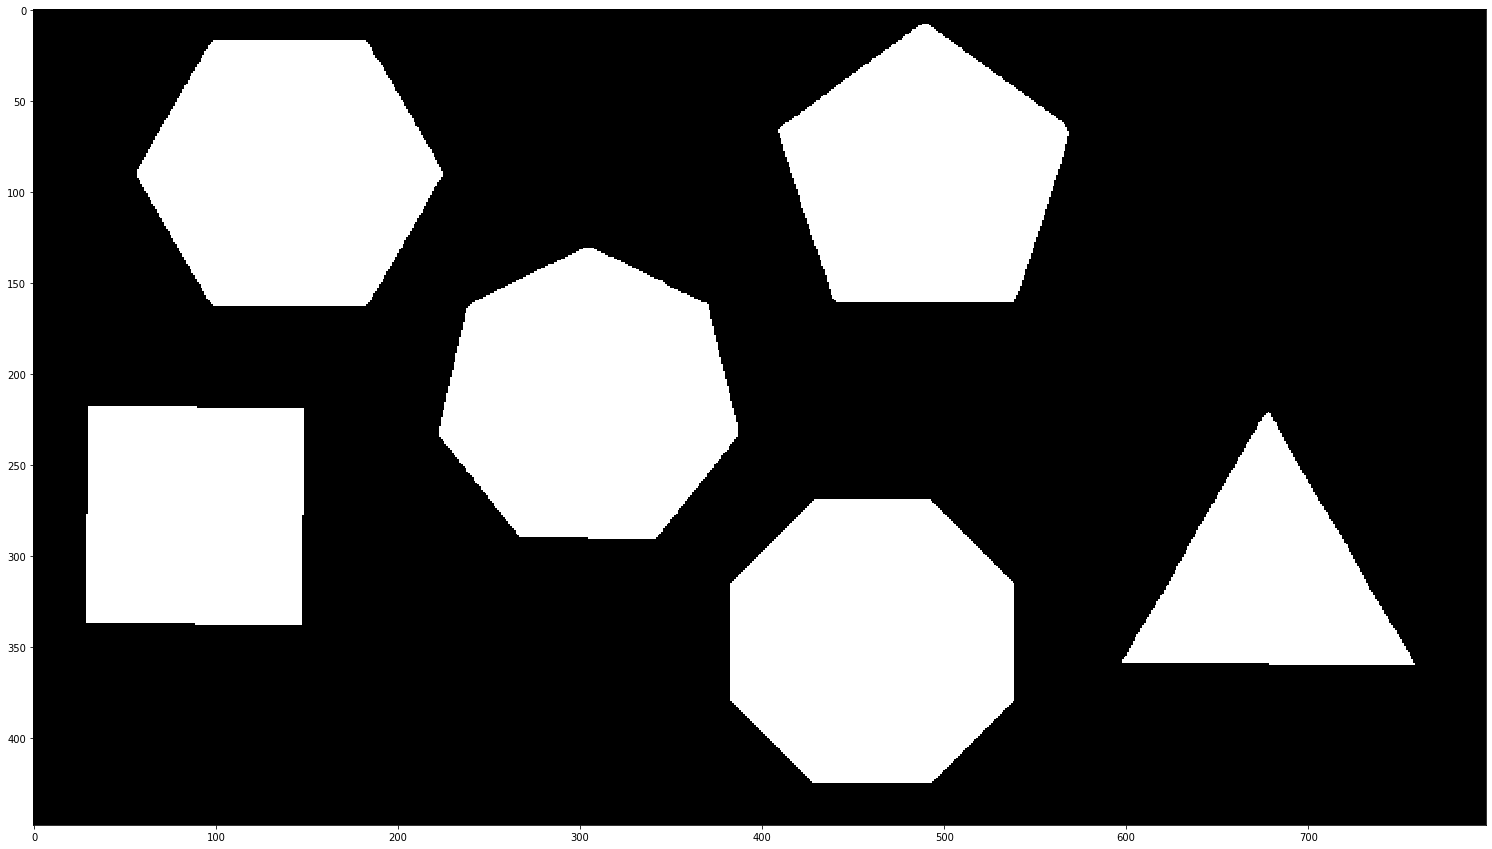

In [14]:
plt.figure(figsize=(30,15))
plt.imshow(mask_full_out,'gray')

In [15]:
mean_val_out = []
for polygon in contours_out:
    black = np.zeros(thresh.shape, np.uint8)
    mask = cv2.drawContours(black,[polygon],-1,255,-1)
    mean_val_out.append(cv2.mean(img,mask = mask))
for i in counter_out_num:
    print("Средний цвет {}а: {}".format(counter_names[i], mean_val_out[int(i/2)]))

Средний цвет восьмиугольника: (238.37728810187028, 157.45632709908475, 40.91573816155989, 0.0)
Средний цвет треугольника: (229.06333392634764, 221.94716242661448, 92.01512186443694, 0.0)
Средний цвет квадрата: (152.23047592148, 27.79522666290072, 156.0839570682107, 0.0)
Средний цвет семиугольника: (76.39836400817995, 190.32678936605316, 37.130163599182005, 0.0)
Средний цвет шестиугольника: (167.75379988184113, 118.85074386379505, 236.8418282399699, 0.0)
Средний цвет пятиугольника: (235.92765759478948, 115.55134915096534, 138.79373110025588, 0.0)


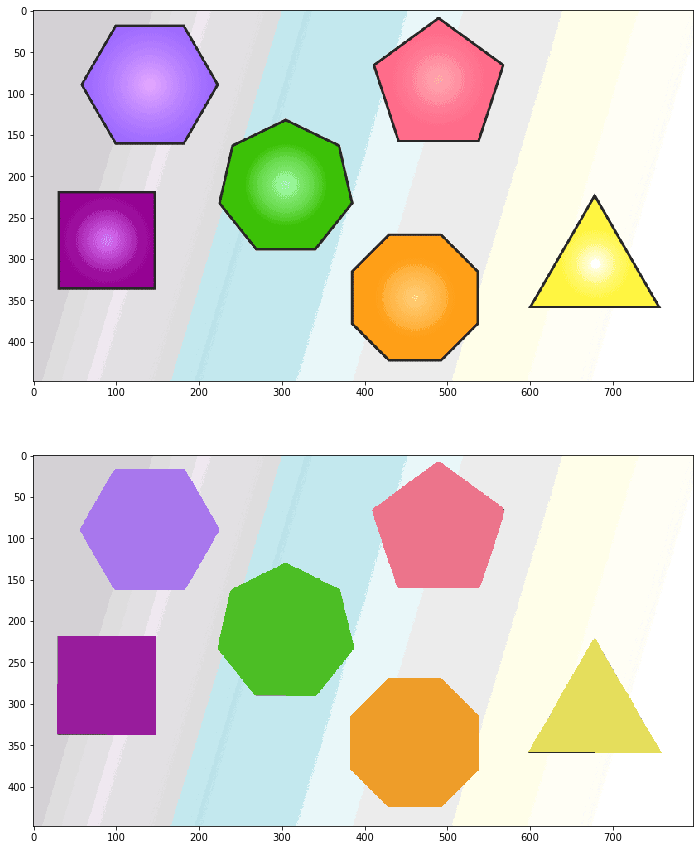

In [16]:
avg_clr_img_out = img.copy()
for i, polygon in enumerate(contours_out):
    color = mean_val_out[i]
    avg_clr_img_out = cv2.drawContours(avg_clr_img_out,[polygon],-1,color,-1)
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)
plt.imshow(img)
plt.subplot(2,1,2)
plt.imshow(avg_clr_img_out)

### Average colour of each polygon excluding border line

In [17]:
black = np.zeros(thresh.shape,np.uint8)
mask_full_in = cv2.drawContours(black,contours_in,-1,255,-1)

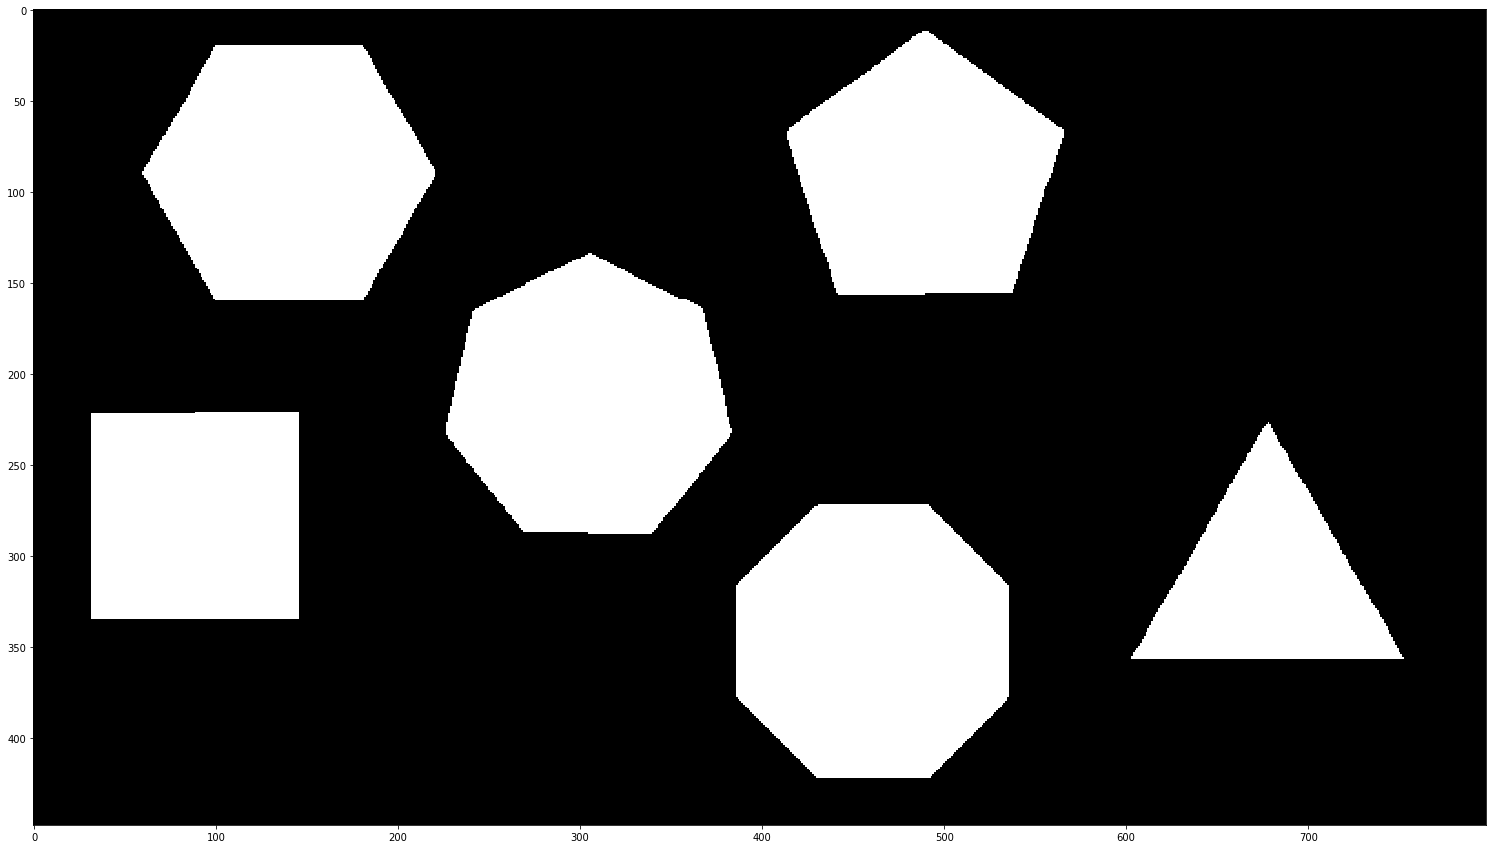

In [18]:
plt.figure(figsize=(30,15))
plt.imshow(mask_full_in,'gray')

In [19]:
mean_val_in = []
for polygon in contours_in:
    black = np.zeros(thresh.shape, np.uint8)
    mask = cv2.drawContours(black,[polygon],-1,255,-1)
    mean_val_in.append(cv2.mean(img,mask = mask))
for i in counter_in_num:
    print("Средний цвет {}а: {}".format(counter_names[i], mean_val_in[round(i/2-1)]))

Средний цвет восьмиугольника: (251.88709503820903, 164.36481541276504, 38.28968894629211, 0.0)
Средний цвет треугольника: (251.87441624365482, 243.77939086294415, 95.63817258883249, 0.0)
Средний цвет квадрата: (161.219646031378, 25.428935775562252, 165.48898678414096, 0.0)
Средний цвет семиугольника: (76.31710864943493, 200.55242251314758, 33.2037037037037, 0.0)
Средний цвет шестиугольника: (176.3535335689046, 122.78881036513545, 252.1218492343934, 0.0)
Средний цвет пятиугольника: (251.97893512535538, 118.59653657275781, 144.31681313000774, 0.0)


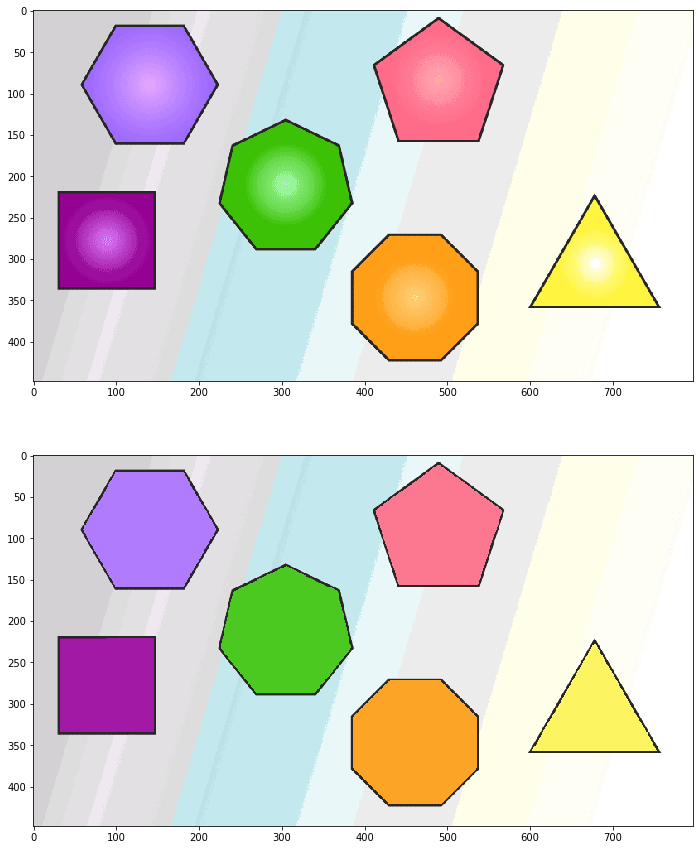

In [20]:
avg_clr_img_in = img.copy()
for i, polygon in enumerate(contours_in):
    color = mean_val_in[i]
    v = cv2.drawContours(avg_clr_img_in,[polygon],-1,color,-1)
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)
plt.imshow(img)
plt.subplot(2,1,2)
plt.imshow(avg_clr_img_in)

### Попарное сравнение результатов

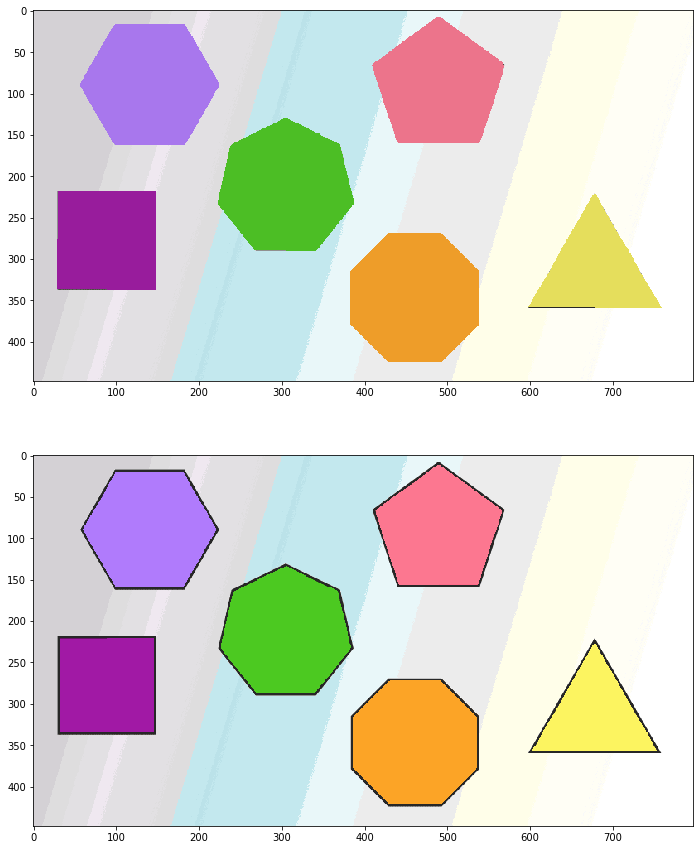

In [21]:
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)
plt.imshow(avg_clr_img_out)
plt.subplot(2,1,2)
plt.imshow(avg_clr_img_in)

In [22]:
for i in counter_in_num:
    print("Средний цвет {}а с контуром: {}".format(counter_names[i], mean_val_out[round(i/2-1)]))
    print("Средний цвет {}а без контура: {}".format(counter_names[i], mean_val_in[round(i/2-1)]),"\n")

Средний цвет восьмиугольника с контуром: (238.37728810187028, 157.45632709908475, 40.91573816155989, 0.0)
Средний цвет восьмиугольника без контура: (251.88709503820903, 164.36481541276504, 38.28968894629211, 0.0) 

Средний цвет треугольника с контуром: (229.06333392634764, 221.94716242661448, 92.01512186443694, 0.0)
Средний цвет треугольника без контура: (251.87441624365482, 243.77939086294415, 95.63817258883249, 0.0) 

Средний цвет квадрата с контуром: (152.23047592148, 27.79522666290072, 156.0839570682107, 0.0)
Средний цвет квадрата без контура: (161.219646031378, 25.428935775562252, 165.48898678414096, 0.0) 

Средний цвет семиугольника с контуром: (76.39836400817995, 190.32678936605316, 37.130163599182005, 0.0)
Средний цвет семиугольника без контура: (76.31710864943493, 200.55242251314758, 33.2037037037037, 0.0) 

Средний цвет шестиугольника с контуром: (167.75379988184113, 118.85074386379505, 236.8418282399699, 0.0)
Средний цвет шестиугольника без контура: (176.3535335689046, 122.7

Значения среднего цвета полигонов с учетом контура темнее значений без контура.

## Task 3
Determine the polygons types (number of vertices)

In [23]:
vertices_number = []
for polygon in contours_out:
    perimeter = cv2.arcLength(polygon, True)
    num = cv2.approxPolyDP(polygon, 0.04 * perimeter, True)
    vertices_number.append(len(num))

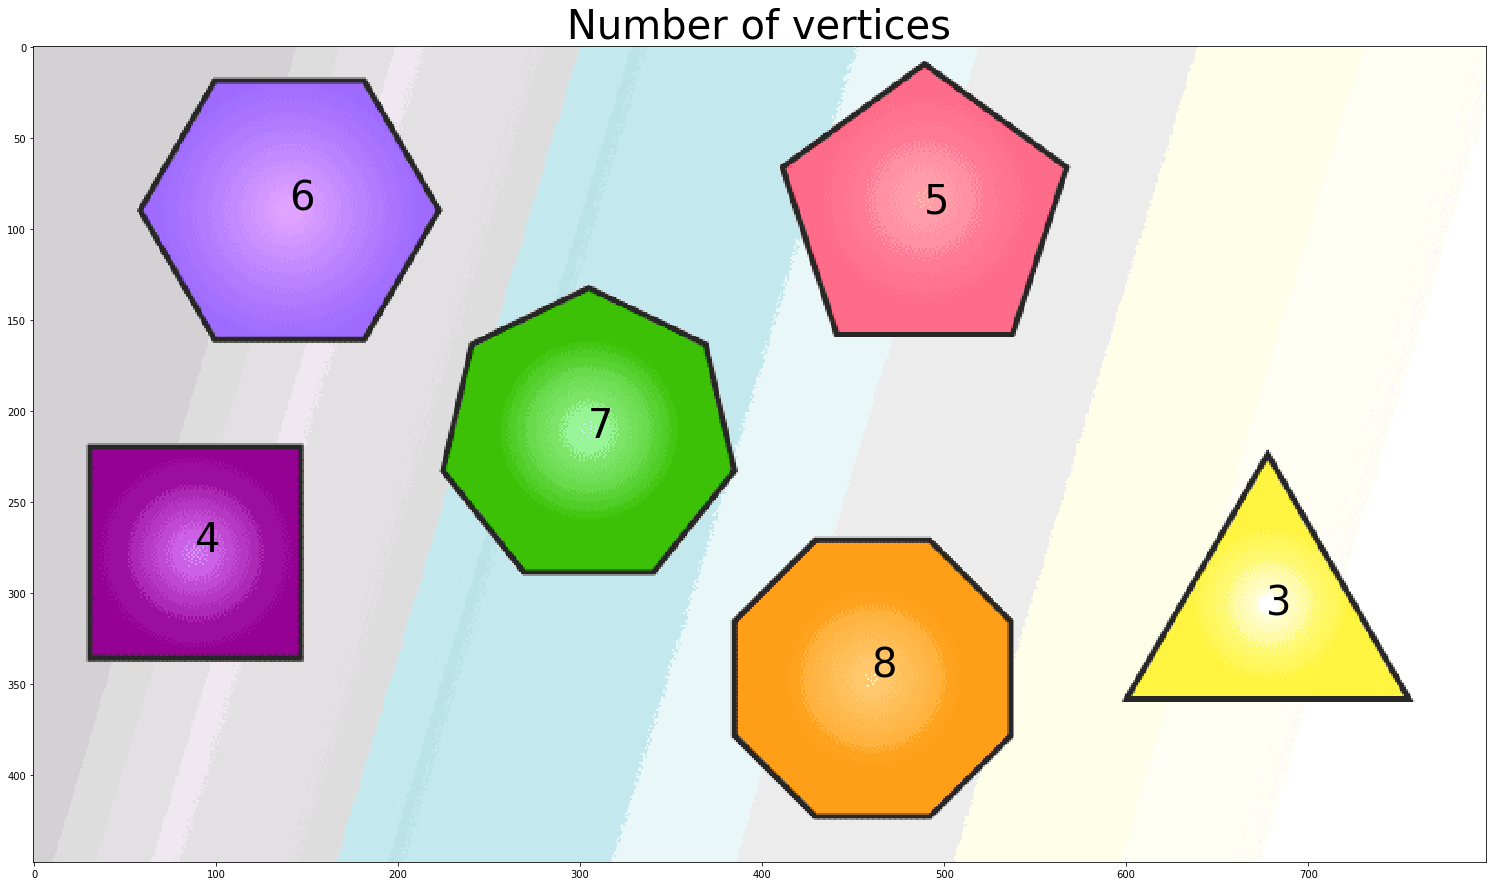

In [24]:
plt.figure(figsize=(30,15))
plt.imshow(img)
for i in range(6):
    plt.text(mass_centers[i][0],mass_centers[i][1],str(vertices_number[i]),fontsize=40)
plt.title("Number of vertices", fontsize = 40)
plt.show()

# Окончательный результат

In [25]:
for i in range(6):
    print("{}: x = {} y = {}, цвет с контуром= {}, цвет без контура = {}, количество вершин = {}".format(counter_names[(i+1)*2],
                                                                                                                      mass_centers[i][0],
                                                                                                                     mass_centers[i][1],
                                                                                                                    [round(t) for t in mean_val_out[i][:3]],
                                                                                                                    [round(t) for t in mean_val_in[i][:3]],
                                                                                                                    vertices_number[i]))

восьмиугольник: x = 460 y = 346, цвет с контуром= [238, 157, 41], цвет без контура = [252, 164, 38], количество вершин = 8
треугольник: x = 677 y = 312, цвет с контуром= [229, 222, 92], цвет без контура = [252, 244, 96], количество вершин = 3
квадрат: x = 88 y = 277, цвет с контуром= [152, 28, 156], цвет без контура = [161, 25, 165], количество вершин = 4
семиугольник: x = 304 y = 214, цвет с контуром= [76, 190, 37], цвет без контура = [76, 201, 33], количество вершин = 7
шестиугольник: x = 140 y = 89, цвет с контуром= [168, 119, 237], цвет без контура = [176, 123, 252], количество вершин = 6
пятиугольник: x = 489 y = 91, цвет с контуром= [236, 116, 139], цвет без контура = [252, 119, 144], количество вершин = 5


### Bonus task

4*. (2) Copy the polygons to a clean image similar to the original one. Preserve polygons centers of mass position, but rotate polygons by pi/n (where n - number of vertices).

In [26]:
new_img = np.zeros_like(img)

C:\Users\irisc\anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


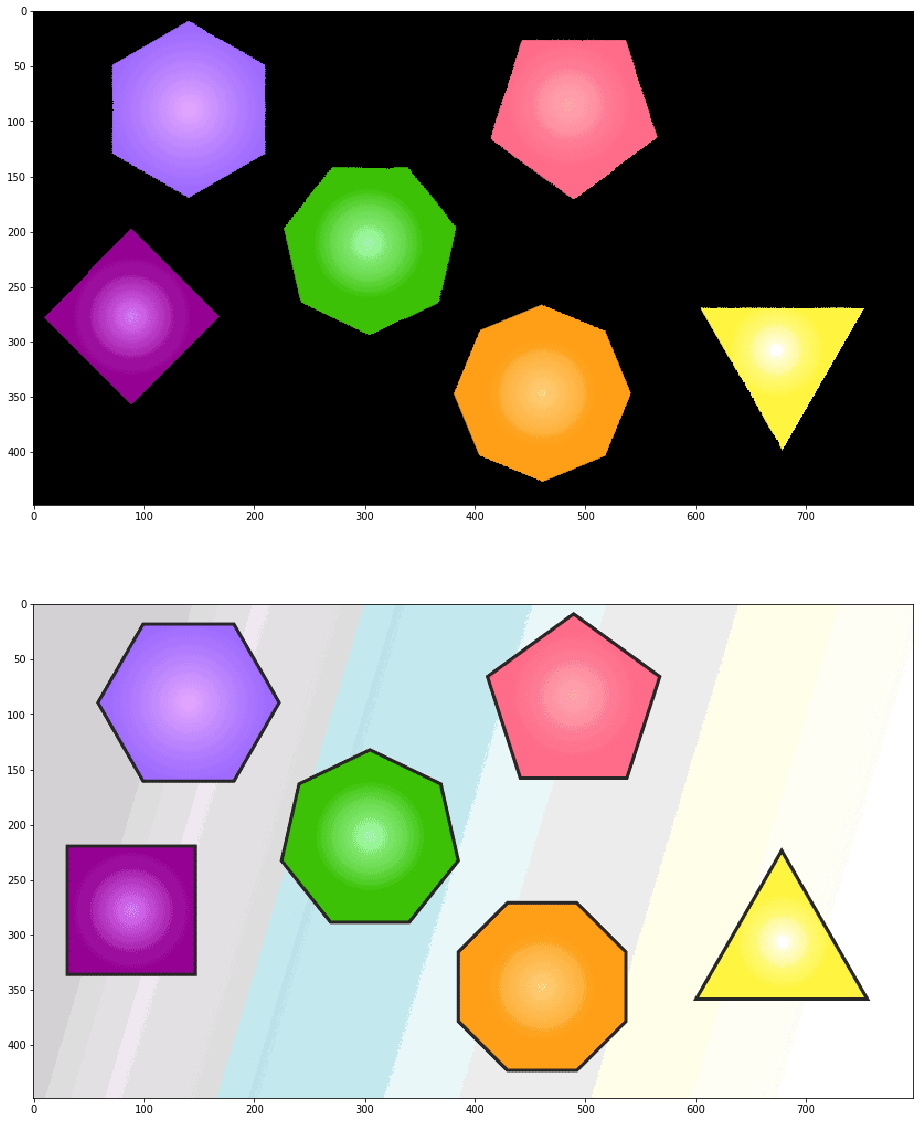

In [27]:
plt.figure(figsize=(30,20))
for i, polygon in enumerate(contours_in):
    #маска для полигона
    black = np.zeros(img.shape, np.uint8)
    mask = cv2.drawContours(black,[polygon],0,255,-1)
    
    #поворот маски и полигона
    image_center = tuple(mass_centers[i])
    rot_mat = cv2.getRotationMatrix2D(image_center, 180/vertices_number[i], 1.0)
    rotated_mask = cv2.warpAffine(mask, rot_mat, new_img.shape[1::-1], flags=cv2.INTER_LINEAR)
    rotated_polygon = cv2.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv2.INTER_LINEAR)
    
    #копирование полигона на новое изображение
    for h in range(img.shape[0]):
        for w in range(img.shape[1]):
            if sum(rotated_mask[h,w])==255:
                new_img[h,w]=rotated_polygon[h,w]
                
    plt.subplot(2,1,1)
    plt.imshow(new_img)
    
plt.subplot(2,1,2)
plt.imshow(img)